In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
from datetime import datetime
%matplotlib inline

In [2]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

<Figure size 1440x1080 with 0 Axes>

In [3]:
import os
os.chdir(r'C:\Users\Rohit Nikam\Downloads\Data Analysis\Stock Analysis\Data\Stocks')

In [4]:
stockData= [x for x in os.listdir() if x.endswith('.txt') and os.path.getsize(x) > 600000]

In [5]:
stockData

['ba.us.txt',
 'dis.us.txt',
 'ge.us.txt',
 'hpq.us.txt',
 'ibm.us.txt',
 'jnj.us.txt',
 'ko.us.txt',
 'mcd.us.txt',
 'mo.us.txt',
 'mrk.us.txt',
 'utx.us.txt',
 'xom.us.txt']

In [6]:
mkr = pd.read_csv(stockData[0],sep=',',index_col='Date')
ibm = pd.read_csv(stockData[1],sep=',',index_col='Date')
xom = pd.read_csv(stockData[2],sep=',',index_col='Date')
ba = pd.read_csv(stockData[3],sep=',',index_col='Date')
dis = pd.read_csv(stockData[4],sep=',',index_col='Date')
mcd = pd.read_csv(stockData[5],sep=',',index_col='Date')
utx = pd.read_csv(stockData[6],sep=',',index_col='Date')
ge = pd.read_csv(stockData[7],sep=',',index_col='Date')
jnj = pd.read_csv(stockData[8],sep=',',index_col='Date')
hpq = pd.read_csv(stockData[9],sep=',',index_col='Date')
ko = pd.read_csv(stockData[10],sep=',',index_col='Date')
mo = pd.read_csv(stockData[11],sep=',',index_col='Date')

In [7]:
mkr.head(10)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1970-01-02,0.7587,0.8092,0.7587,0.8092,753088,0
1970-01-05,0.8263,0.8429,0.8263,0.8345,879203,0
1970-01-06,0.8429,0.8598,0.8429,0.8429,1607067,0
1970-01-07,0.8429,0.8598,0.8429,0.8512,767501,0
1970-01-08,0.8512,0.8512,0.8263,0.8429,958476,0
1970-01-09,0.8429,0.8512,0.8176,0.8176,753088,0
1970-01-12,0.8176,0.8263,0.8092,0.8092,673818,0
1970-01-13,0.8092,0.8092,0.7672,0.7756,1048558,0
1970-01-14,0.7672,0.7672,0.7504,0.7672,1311595,0


In [8]:
# Create a Dataframe for closing price
closePrice = pd.DataFrame()
closePrice['mkr'] = mkr['Close']
closePrice['ibm'] = ibm['Close']
closePrice['xom'] = xom['Close']
closePrice['ba'] = ba['Close']
closePrice['dis'] = dis['Close']
closePrice['mcd'] = mcd['Close']
closePrice['utx'] = utx['Close']
closePrice['ge'] = ge['Close']
closePrice['jnj'] = jnj['Close']
closePrice['ko'] = ko['Close']
closePrice['mo'] = mo['Close']

In [9]:
closePrice = closePrice.fillna(method='ffill')

In [10]:
closePrice.index =closePrice.index.astype('datetime64[ns]')

In [11]:
closePrice.describe()

,mkr,ibm,xom,ba,dis,mcd,utx,ge,jnj,ko,mo
count,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000
mean,34.460888,20.621631,12.146434,6.739431,55.159845,27.123054,13.353481,25.141534,9.266966,25.912989,26.536918
std,41.237758,26.476530,11.926901,6.354074,50.183733,31.874355,13.062106,33.157412,15.254820,32.990099,27.409598
min,0.311950,0.282980,0.498920,0.114820,7.899200,0.382510,0.391520,0.186210,0.014620,0.205530,1.214100
25%,4.265400,1.022400,1.110900,1.056300,14.712000,1.253300,0.950300,1.354025,0.153390,1.516000,3.132500
50%,19.431000,12.250000,6.396500,3.751100,26.068000,8.561600,8.711200,10.810000,2.645700,5.729800,12.218500
75%,48.962750,27.872750,23.297000,11.663250,86.495250,48.765500,22.483250,32.123000,11.775000,43.679000,47.950000
max,264.710000,118.240000,48.056000,29.857000,186.360000,143.620000,46.620000,170.770000,76.890000,122.960000,91.892000


In [12]:
closePrice.head()

,mkr,ibm,xom,ba,dis,mcd,utx,ge,jnj,ko,mo
Date,,,,,,,,,,,
1970-01-02,0.8092,0.5204,0.6362,0.30627,15.162,0.5941,0.6975,0.29161,0.0219,0.33400,1.4972
1970-01-05,0.8345,0.5204,0.6362,0.31385,15.305,0.5776,0.6894,0.29954,0.0219,0.32548,1.5297
1970-01-06,0.8429,0.5111,0.6201,0.30996,15.313,0.5864,0.6934,0.29954,0.0219,0.32548,1.5216
1970-01-07,0.8512,0.5204,0.6201,0.31385,15.330,0.5864,0.6975,0.29954,0.0219,0.32548,1.5138
1970-01-08,0.8429,0.5294,0.6277,0.31385,15.356,0.5941,0.7016,0.29954,0.0219,0.32548,1.5138


### Plotting a graph of the closing data for the selected stocks.

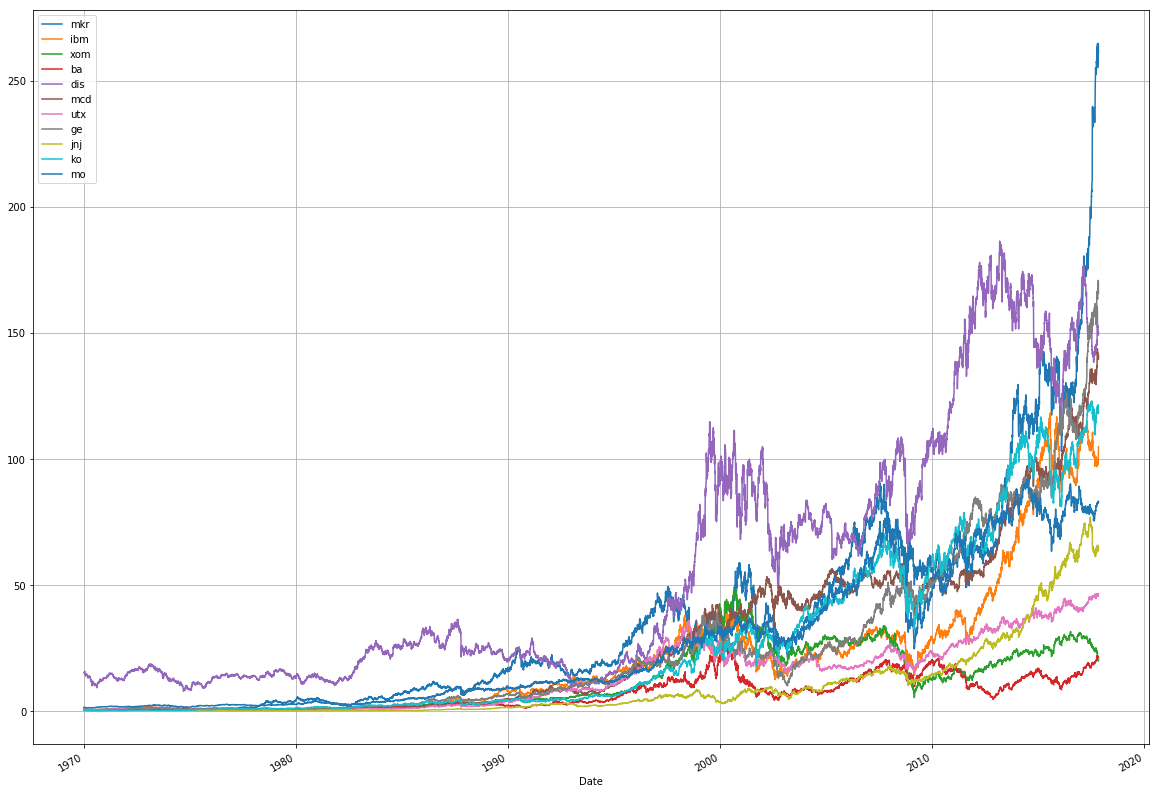

In [13]:
closingGraph = pd.concat([closePrice['mkr'],closePrice['ibm'],closePrice['xom'],closePrice['ba'],
               closePrice['dis'],closePrice['mcd'],closePrice['utx'],closePrice['ge'],
               closePrice['jnj'],closePrice['ko'],closePrice['mo']],
              axis=1).plot(figsize=(20,15),grid=True)

As we can observe from the above graph that stock prices soared after 1994. We decided to consider stock prices of the date after 1994. 

In [14]:
# Removing stock prices of the date before 1994
closePrice = closePrice[closePrice.index.year>=1994]

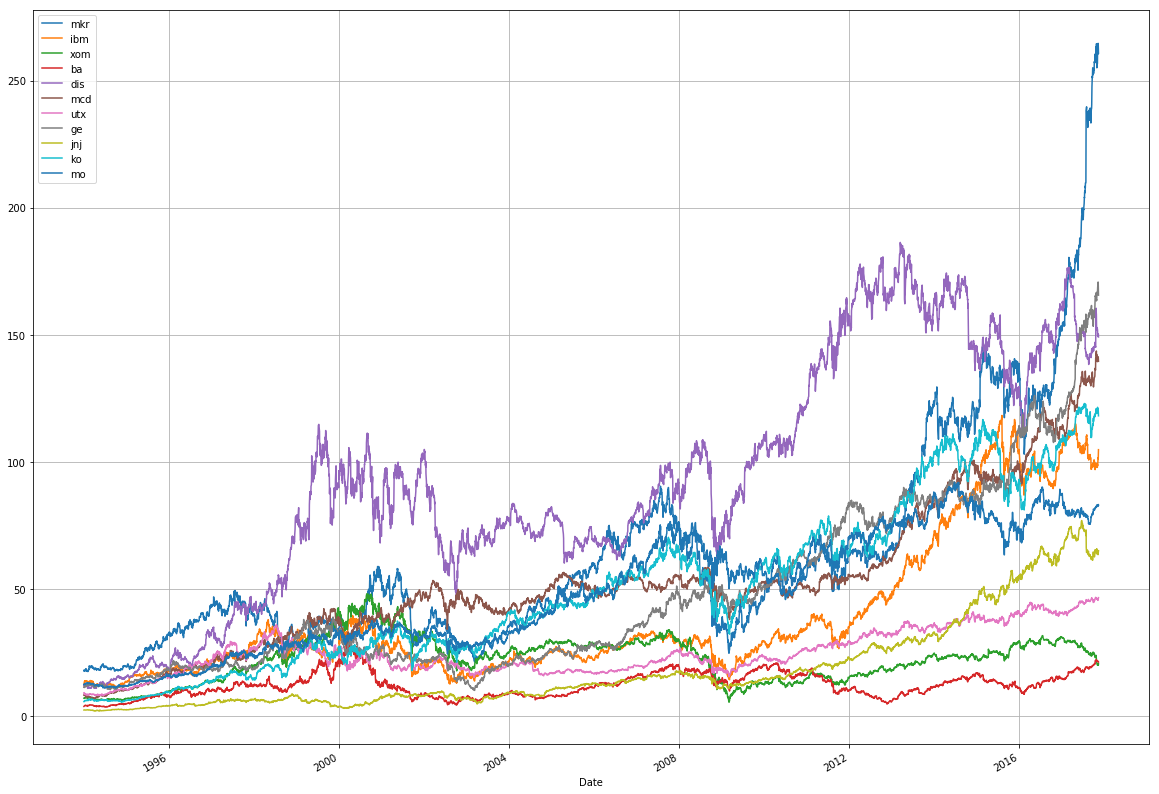

In [15]:
closingGraph = pd.concat([closePrice['mkr'],closePrice['ibm'],closePrice['xom'],closePrice['ba'],
               closePrice['dis'],closePrice['mcd'],closePrice['utx'],closePrice['ge'],
               closePrice['jnj'],closePrice['ko'],closePrice['mo']],
              axis=1).plot(figsize=(20,15),grid=True)

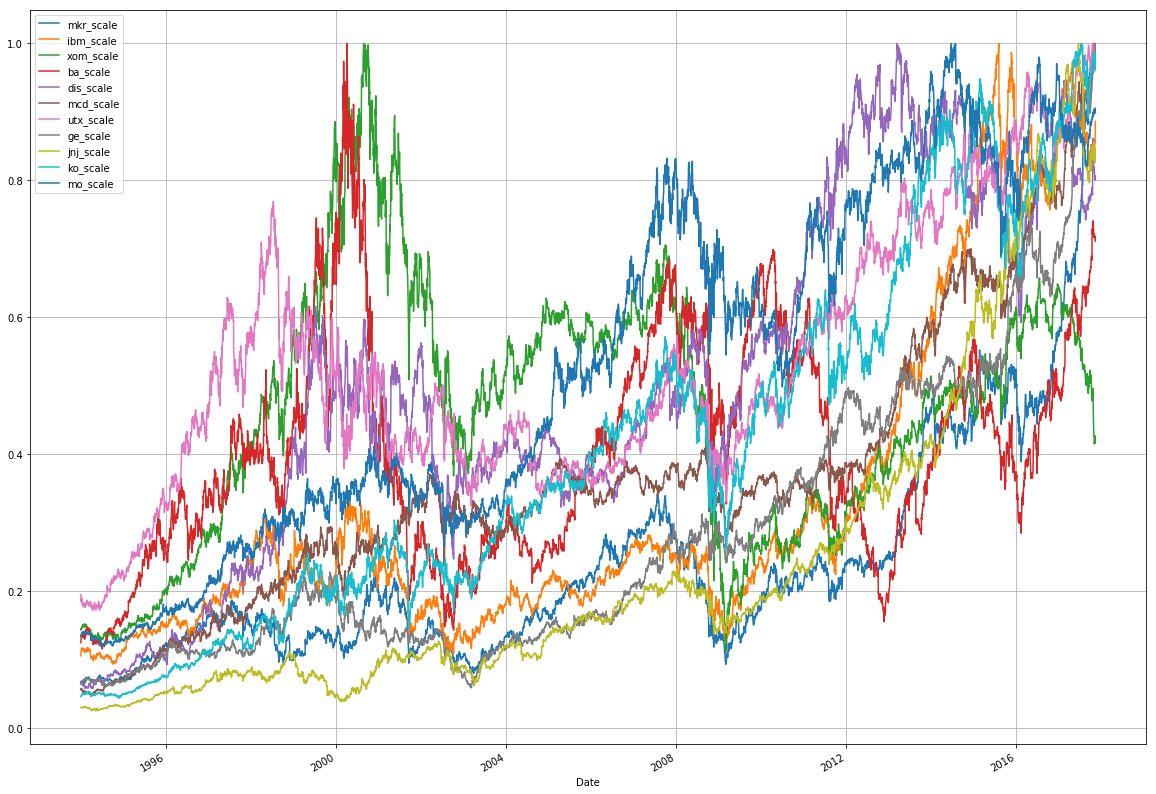

In [16]:
companyList = closePrice.columns
for idx in companyList:
    closePrice[idx+'_scale'] = closePrice[idx]/max(closePrice[idx])
closingGraph = pd.concat([closePrice['mkr_scale'],closePrice['ibm_scale'],closePrice['xom_scale'],closePrice['ba_scale'],
               closePrice['dis_scale'],closePrice['mcd_scale'],closePrice['utx_scale'],closePrice['ge_scale'],
               closePrice['jnj_scale'],closePrice['ko_scale'],closePrice['mo_scale']],
              axis=1).plot(figsize=(20,15),grid=True)

We see a pattern from 1998 to 2002 that prices for all stocks rise and start decline around 2009.

C:\Users\Rohit Nikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


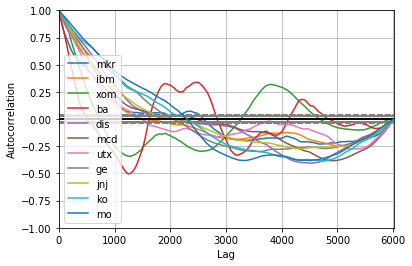

In [17]:
for i in companyList:
    if '_scale' not in i:
        corrPrice = autocorrelation_plot(closePrice[i],label=i)

 We observe that most of the companies, except for two, are in decline in 2000, so they seem to have a correlation with each other. It shows that an index is about to continue to rise when it is in a rising position, and then to fall when it is a falling market.

C:\Users\Rohit Nikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


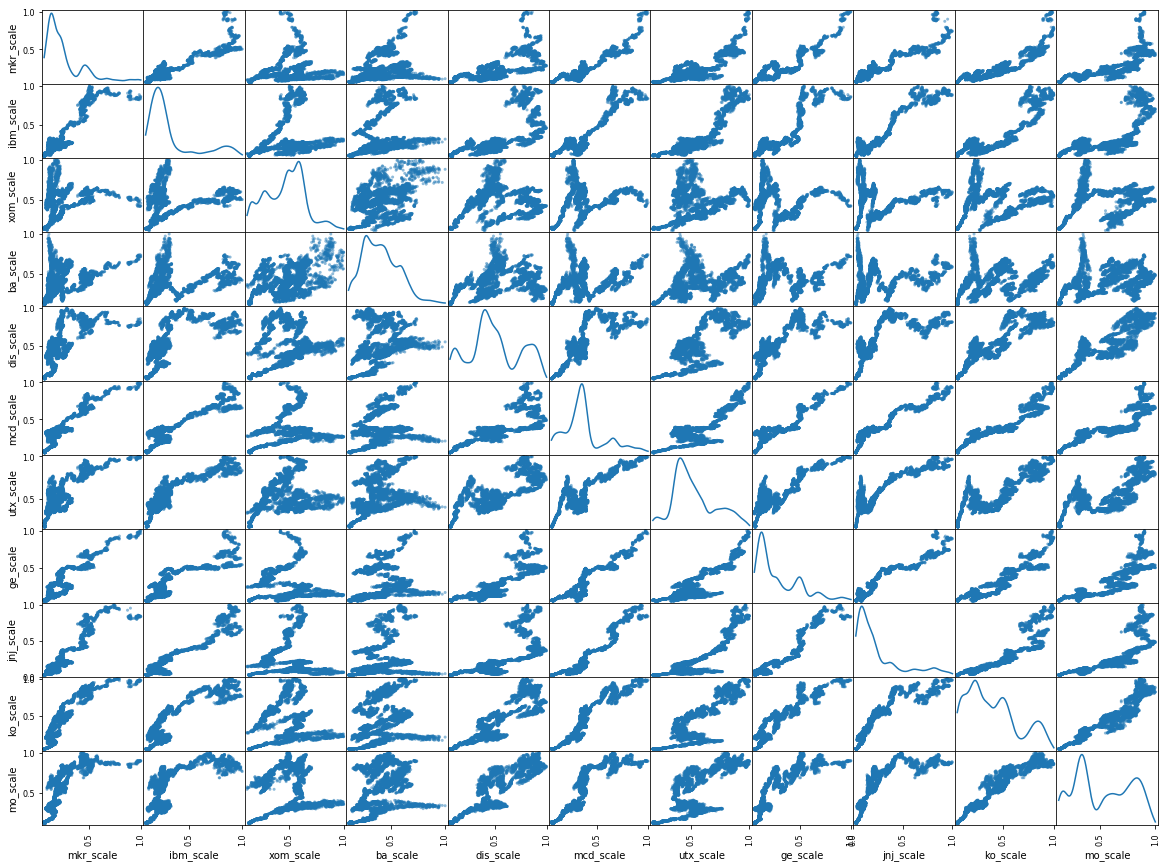

In [18]:
scatterClosePrice = scatter_matrix(pd.concat([closePrice['mkr_scale'],closePrice['ibm_scale'],
                              closePrice['xom_scale'],closePrice['ba_scale'],
                              closePrice['dis_scale'],closePrice['mcd_scale'],
                              closePrice['utx_scale'],closePrice['ge_scale'],
                              closePrice['jnj_scale'],closePrice['ko_scale'],
                              closePrice['mo_scale']],axis=1),figsize=(20,15),diagonal='kde')

We find evidence that indexes are strongly correlated, that our premise is working, and that one market can affect another.

The actual values in some indexes are not useful for modelling. This may be a useful metric, but from a core point of view, time series data is fixed at the mean and therefore there is no trend in data. There are many ways to do this, but all of this is to look at the differences between the values essentially rather than looking at the absolute values. For market data, a common way to deal with recorded results is to calculate the values taken from the natural logs after dividing the indices today by yesterday's index

There are a number of reasons why log returns are preferred over percentages returns, for example, when a log can be totaled and follows a normal distribution. However, this is not a big deal. All I'm interested in is getting fixed time series data.

In [19]:
logData = pd.DataFrame()
for idx in companyList:
    if '_scale' not in idx:
        logData[idx+'_log'] = np.log(closePrice[idx]/closePrice[idx].shift())

In [20]:
logData.describe()

,mkr_log,ibm_log,xom_log,ba_log,dis_log,mcd_log,utx_log,ge_log,jnj_log,ko_log,mo_log
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,0.000446,0.000354,0.000180,0.000290,0.000420,0.000472,0.000272,0.000447,0.000557,0.000507,0.000317
std,0.019036,0.018908,0.018196,0.024298,0.017583,0.012956,0.013954,0.015092,0.016750,0.016817,0.015016
min,-0.193858,-0.202883,-0.136801,-0.223320,-0.169323,-0.172477,-0.110794,-0.137060,-0.150549,-0.331967,-0.150265
25%,-0.009252,-0.009063,-0.008149,-0.011094,-0.007754,-0.005898,-0.006376,-0.007166,-0.006684,-0.007282,-0.007322
50%,0.000401,0.000219,0.000000,0.000255,0.000224,0.000160,0.000256,0.000404,0.000676,0.000272,0.000215
75%,0.010485,0.009479,0.008648,0.012050,0.008551,0.006677,0.006913,0.007959,0.008181,0.008906,0.008246
max,0.143816,0.148182,0.179838,0.159486,0.123737,0.115377,0.129951,0.103279,0.151892,0.127905,0.158676


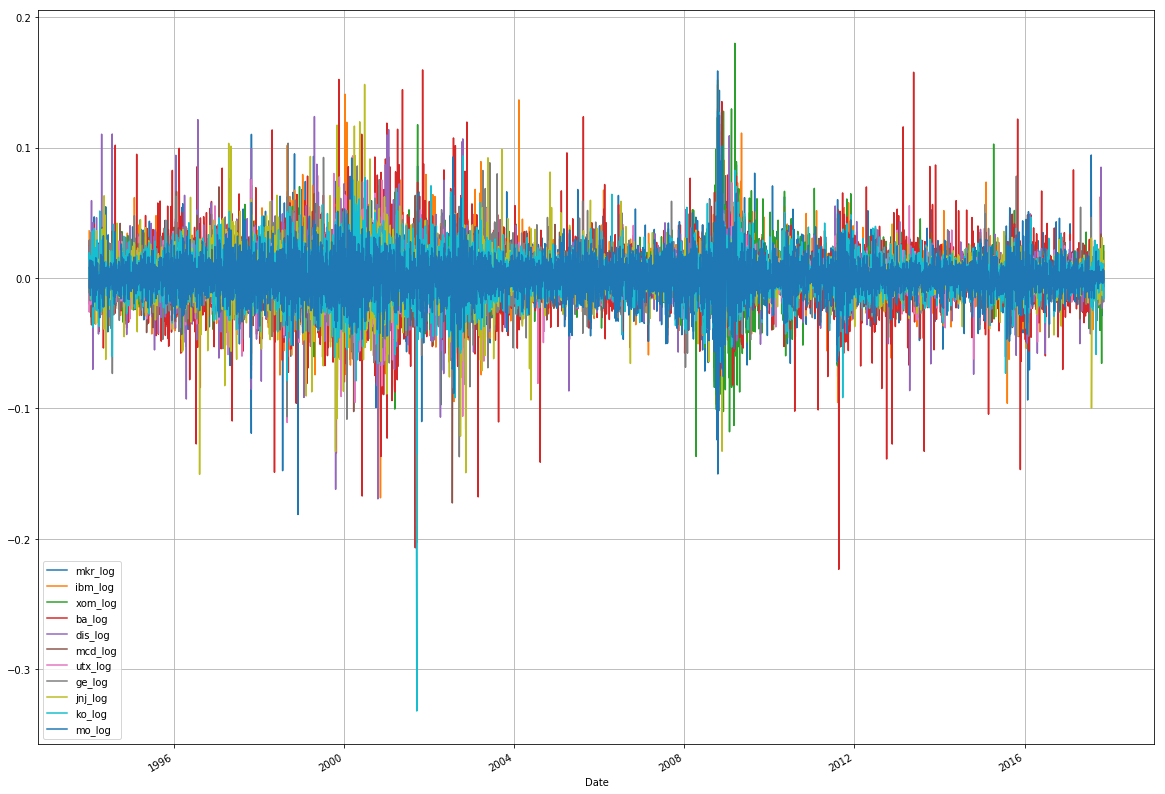

In [21]:
logGraph = pd.concat([logData['mkr_log'],logData['ibm_log'],logData['xom_log'],
               logData['ba_log'],logData['dis_log'],logData['mcd_log'],
               logData['utx_log'],logData['ge_log'],logData['jnj_log'],
               logData['ko_log'],logData['mo_log']],axis=1).plot(figsize=(20,15),grid=True)

C:\Users\Rohit Nikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


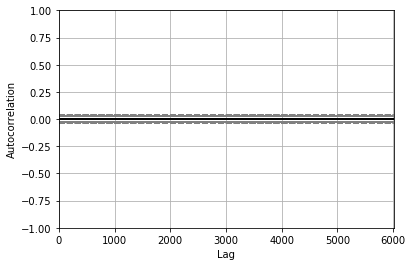

In [22]:
listLog = logData.columns

for i in listLog:
    logCorrPlot = autocorrelation_plot(logData[i])

Markov process An estimation process based on the assumption that the probability of each event among a series of random events depends only on prior results. That is, the probability that the future state is determined by the present and that the past is not the variable.

Nothing comes out of the table of. Because financial market is Macos process, knowledge of the past predicts the future. It is not helpful.

The above data had a centralized and sized mean similar to the time-series data.

### Let's demostrate Markov's processes

In [23]:
#Let's take a look at the basic correlation.
logData.corr()

,mkr_log,ibm_log,xom_log,ba_log,dis_log,mcd_log,utx_log,ge_log,jnj_log,ko_log,mo_log
mkr_log,1.000000,0.401031,0.437681,0.301995,0.306531,0.308489,0.300318,0.291016,0.210525,0.540448,0.381340
ibm_log,0.401031,1.000000,0.494888,0.362595,0.378657,0.323414,0.313980,0.306428,0.240433,0.455640,0.379980
xom_log,0.437681,0.494888,1.000000,0.377087,0.434177,0.393002,0.367583,0.350357,0.253323,0.531695,0.422061
ba_log,0.301995,0.362595,0.377087,1.000000,0.458360,0.203776,0.211050,0.231023,0.155782,0.354900,0.275046
dis_log,0.306531,0.378657,0.434177,0.458360,1.000000,0.269544,0.243498,0.265223,0.207334,0.370688,0.317392
mcd_log,0.308489,0.323414,0.393002,0.203776,0.269544,1.000000,0.407407,0.306864,0.272303,0.333720,0.388564
utx_log,0.300318,0.313980,0.367583,0.211050,0.243498,0.407407,1.000000,0.330169,0.294869,0.338309,0.371566
ge_log,0.291016,0.306428,0.350357,0.231023,0.265223,0.306864,0.330169,1.000000,0.245074,0.333200,0.289845
jnj_log,0.210525,0.240433,0.253323,0.155782,0.207334,0.272303,0.294869,0.245074,1.000000,0.231887,0.290907
ko_log,0.540448,0.455640,0.531695,0.354900,0.370688,0.333720,0.338309,0.333200,0.231887,1.000000,0.432607


 So how would that correlate to the data two days ago at this point?

In [24]:
yesterday = pd.DataFrame()
yesterday['mkr'] = logData['mkr_log'].shift(1)
yesterday['ibm'] = logData['ibm_log'].shift(1)
yesterday['xom'] = logData['xom_log'].shift(1)
yesterday['ba'] = logData['ba_log'].shift(1)
yesterday['dis'] = logData['dis_log'].shift(1)
yesterday['mcd'] = logData['mcd_log'].shift(1)
yesterday['utx'] = logData['utx_log'].shift(1)
yesterday['ge'] = logData['ge_log'].shift(1)
yesterday['jnj'] = logData['jnj_log'].shift(1)
yesterday['ko'] = logData['ko_log'].shift(1)
yesterday['mo'] = logData['mo_log'].shift(1)

In [25]:
all = pd.concat([logData,yesterday],axis=1)

In [26]:
all.corr()

,mkr_log,ibm_log,xom_log,ba_log,dis_log,mcd_log,utx_log,ge_log,jnj_log,ko_log,...,ibm,xom,ba,dis,mcd,utx,ge,jnj,ko,mo
mkr_log,1.000000,0.401031,0.437681,0.301995,0.306531,0.308489,0.300318,0.291016,0.210525,0.540448,...,0.005326,0.009367,-0.016810,-0.007335,0.005223,0.027284,-0.003375,-0.028932,0.001330,-0.026817
ibm_log,0.401031,1.000000,0.494888,0.362595,0.378657,0.323414,0.313980,0.306428,0.240433,0.455640,...,-0.029652,-0.011445,0.006734,0.010137,-0.008873,-0.003490,0.011923,-0.028933,-0.002450,-0.037526
xom_log,0.437681,0.494888,1.000000,0.377087,0.434177,0.393002,0.367583,0.350357,0.253323,0.531695,...,-0.005265,-0.005640,-0.025706,-0.016636,0.004236,-0.011465,-0.012640,-0.039709,-0.024821,-0.023633
ba_log,0.301995,0.362595,0.377087,1.000000,0.458360,0.203776,0.211050,0.231023,0.155782,0.354900,...,0.001278,0.011567,-0.023929,-0.005613,0.008375,0.015430,0.004794,0.003205,0.011432,-0.002618
dis_log,0.306531,0.378657,0.434177,0.458360,1.000000,0.269544,0.243498,0.265223,0.207334,0.370688,...,-0.024046,-0.031671,-0.015274,-0.025434,-0.026301,-0.022408,0.004734,-0.031030,-0.031888,-0.031616
mcd_log,0.308489,0.323414,0.393002,0.203776,0.269544,1.000000,0.407407,0.306864,0.272303,0.333720,...,-0.044069,-0.023756,-0.058355,-0.046623,-0.001137,0.017529,-0.026331,-0.015333,-0.042094,-0.058942
utx_log,0.300318,0.313980,0.367583,0.211050,0.243498,0.407407,1.000000,0.330169,0.294869,0.338309,...,-0.052230,-0.019804,-0.067514,-0.057844,-0.019956,-0.002694,-0.015523,-0.056038,-0.036202,-0.062656
ge_log,0.291016,0.306428,0.350357,0.231023,0.265223,0.306864,0.330169,1.000000,0.245074,0.333200,...,-0.023096,-0.009409,-0.031735,-0.028729,-0.013270,-0.001243,-0.015727,-0.011050,-0.027238,-0.042376
jnj_log,0.210525,0.240433,0.253323,0.155782,0.207334,0.272303,0.294869,0.245074,1.000000,0.231887,...,-0.044213,-0.000463,-0.041746,-0.032124,-0.019617,0.004725,-0.017830,-0.037796,-0.003346,-0.057375
ko_log,0.540448,0.455640,0.531695,0.354900,0.370688,0.333720,0.338309,0.333200,0.231887,1.000000,...,-0.008438,0.010633,-0.025468,-0.011412,0.032771,0.019516,0.005806,-0.026623,-0.037067,-0.026427


From the results above, the more data you enter into the past, You can see that the correlation is marginal. That is, stock forecasting, in line with the Marcos process, is enabled at this time. Historical data is not helpful.